# Classification Tree - Competitive Autions Prediction

This program is a solution to the problem 9.1 of chapter 9 of following book. 

Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python, First Edition.

Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel

© 2020 John Wiley & Sons, Inc. Published 2020 by John Wiley & Sons, Inc.

## Chapter 9, Problem 9.1

Competitive Auctions on eBay.com. The file eBayAuctions.csv contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal is to use these data to build a model that will classify auctions as competitive or noncompetitive. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive. 

Data Preprocessing. Convert variable Duration into a categorical variable. Split the data into training (60%) and validation (40%) datasets.

    a. Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in terms of rules. (Note: If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?)
    
    b. Is this model practical for predicting the outcome of a new auction?
    
    c. Describe the interesting and uninteresting information that these rules provide.
    
    d. Fit another classification tree (using a tree with a minimum number of records per terminal node = 50 and maximum depth = 7), this time only with predictors that can be used for predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make sure to report the smallest set of rules required for classification.
    
    e. Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors. Each auction will appear as a point, with coordinates corresponding to its values on those two predictors. Use different colors or symbols to separate competitive and noncompetitive auctions. Draw lines (you can sketch these by hand or use Python) at the values that create splits. Does this splitting seem reasonable with respect to the meaning of the two predictors? Does it seem to do a good job of separating the two classes?
    
    f. Examine the lift chart and the confusion matrix for the tree. What can you say about the predictive performance of this model?
    
    g. Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)? What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

## Importing Libraries

In [35]:
import pandas as pd

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
import dmba
from dmba import plotDecisionTree

Printing versions of libraries

In [36]:
print('pandas version: {}'.format(pd.__version__))
print('sklearn version: {}'.format(skl.__version__))
print('dmba version: {}'.format(dmba.__version__))

pandas version: 1.5.3
sklearn version: 1.2.1
dmba version: 0.2.4


## Loading Dataset

In [37]:
df = pd.read_csv('eBayAuctions.csv')
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


## Data Preprocessing

Converting variable 'Duration' into categorical variable. 

In [38]:
bins = [0, 3, 7, 10]
labels = ["Short", "Medium", "Long"]
df["Duration"] = pd.cut(df["Duration"], bins=bins, labels=labels)
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,Medium,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,Medium,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,Medium,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,Medium,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,Medium,Mon,0.01,0.01,0


Splitting the data into training (60%) and validation (40%) datasets.

In [39]:
X = df.drop(columns=['Competitive?'])
X = pd.get_dummies(X, columns=['Category', 'currency', 'Duration', 'endDay']) 
y = df['Competitive?']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

##### a. Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in terms of rules. (Note: If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?)

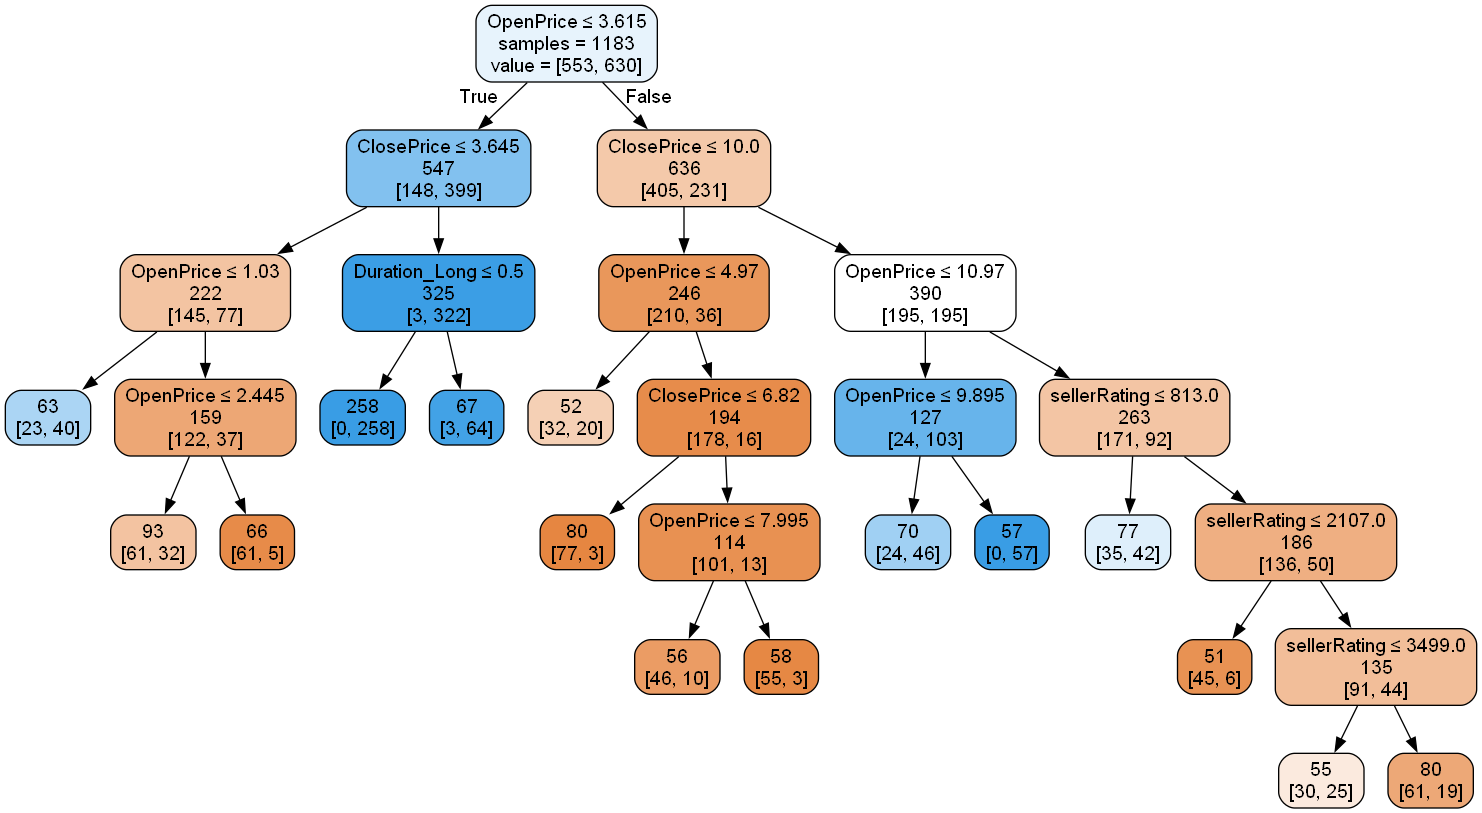

In [40]:
fullClassTree = DecisionTreeClassifier(random_state=1,min_samples_leaf=50, max_depth=7)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

Writing down results in terms of rules. Writing only one rule to save some time.

In [48]:
print('Rule 1 (Full)   : (OpenPrice <= 3.615) AND (ClosePrice <= 3.645) AND (OpenPrice <= 1.03) THEN Competitive? = 1')
print('Rule 1 (Reduced): (OpenPrice <= 1.03) AND (ClosePrice <= 3.645) THEN Competitive? = 1')

Rule 1 (Full)   : (OpenPrice <= 3.615) AND (ClosePrice <= 3.645) AND (OpenPrice <= 1.03) THEN Competitive? = 1
Rule 1 (Reduced): (OpenPrice <= 1.03) AND (ClosePrice <= 3.645) THEN Competitive? = 1


##### If you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be a good variable to choose?

The good variable would be 'ClosePrice' because 'ClosePrice' is available only after the auction is complete not before the auction. Since our objective is to predict whether or
not the prospect auction will be competitive, 'ClosePrice' of prospect auction will not be available during prediction. Therefore, it would not help much in prediction if we train the classifier to consider 'ClosePrice' column and thus 'ClosePrice' variable can be removed from the list of predictors. 